In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [3]:
accident23_df=pd.read_csv(r'C:\Users\prasad\Downloads\Accidents0514\Accidents0514.csv', low_memory=False)

# Droping Duplicates

In [4]:
accident23_df=accident23_df.drop_duplicates()
print(accident23_df.shape)

(1640597, 32)


# After importing dataset the first five instances of the dataset can be examined by using accident12_df.head():

In [5]:
accident23_df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,7,1,2,0,0,1,1,E01002863


# Counts The Accident Severity:

In [6]:
accident23_df.Accident_Severity.value_counts()

3    1397173
2     222042
1      21382
Name: Accident_Severity, dtype: int64

# Displaying The shape& size of the data set:

In [7]:
accident23_df.shape

(1640597, 32)

In [8]:
print(accident23_df.size)

52499104


# Displaying the total coloumns

In [9]:
print(accident23_df.columns)

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')


# Drop The Column

In [10]:
data=accident23_df.drop(axis=1,columns='LSOA_of_Accident_Location')
data.shape  

(1640597, 31)

In [11]:
data.isnull().sum()

Accident_Index                                   0
Location_Easting_OSGR                          111
Location_Northing_OSGR                         111
Longitude                                      111
Latitude                                       111
Police_Force                                     0
Accident_Severity                                0
Number_of_Vehicles                               0
Number_of_Casualties                             0
Date                                             0
Day_of_Week                                      0
Time                                           133
Local_Authority_(District)                       0
Local_Authority_(Highway)                        0
1st_Road_Class                                   0
1st_Road_Number                                  0
Road_Type                                        0
Speed_limit                                      0
Junction_Detail                                  0
Junction_Control               

In [12]:
data.dropna(inplace=True)
data.shape

(1640353, 31)

# Displaying Numerical Data:

In [13]:
numerical=accident23_df.columns[accident23_df.dtypes==(np.float64 or np.int64)]
numerical

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude'],
      dtype='object')

# Displaying Categorical data:

In [14]:
cat=data.columns[data.dtypes=='object']
cat

Index(['Accident_Index', 'Date', 'Time', 'Local_Authority_(Highway)'], dtype='object')

In [15]:
accident23_df[cat].head()

,Accident_Index,Date,Time,Local_Authority_(Highway)
0,200501BS00001,04/01/2005,17:42,E09000020
1,200501BS00002,05/01/2005,17:36,E09000020
2,200501BS00003,06/01/2005,00:15,E09000020
3,200501BS00004,07/01/2005,10:35,E09000020
4,200501BS00005,10/01/2005,21:13,E09000020


# Drop the unnecessary columns

In [ ]:
data_df=data.drop(['Location_Northing_OSGR','Longitude','Location_Easting_OSGR','Latitude','Longitude','Local_Authority_(District)','Local_Authority_(Highway)','1st_Road_Class','1st_Road_Number','2nd_Road_Class','2nd_Road_Number','Carriageway_Hazards'],axis='columns')

In [17]:
data_df.shape

(1640353, 20)

# After that the information of the data is gained by using data_df.describe(). It is shown as follows:

In [18]:
data_df.describe()

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Junction_Detail,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
count,1.640353e+06,1.640353e+06,1.640353e+06,1.640353e+06,1.640353e+06,1.640353e+06,1.640353e+06,1.640353e+06,1.640353e+06,1.640353e+06,1.640353e+06,1.640353e+06,1.640353e+06,1.640353e+06,1.640353e+06,1.640353e+06,1.640353e+06
mean,3.082039e+01,2.838594e+00,1.831316e+00,1.351185e+00,4.117033e+00,5.166785e+00,3.910031e+01,2.337483e+00,1.812269e+00,9.434555e-03,7.288559e-01,1.950367e+00,1.581132e+00,1.363474e+00,1.099306e-01,1.357312e+00,1.193019e+00
std,2.553622e+01,4.017744e-01,7.152835e-01,8.261257e-01,1.924820e+00,1.644804e+00,1.417735e+01,2.578922e+00,2.305298e+00,1.279773e-01,1.808604e+00,1.647952e+00,1.652233e+00,6.296057e-01,7.331475e-01,4.792536e-01,4.007577e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-1.000000e+00
25%,7.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,3.000000e+01,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
50%,3.100000e+01,3.000000e+00,2.000000e+00,1.000000e+00,4.000000e+00,6.000000e+00,3.000000e+01,3.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
75%,4.600000e+01,3.000000e+00,2.000000e+00,1.000000e+00,6.000000e+00,6.000000e+00,5.000000e+01,3.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00
max,9.800000e+01,3.000000e+00,6.700000e+01,9.300000e+01,7.000000e+00,9.000000e+00,7.000000e+01,9.000000e+00,4.000000e+00,2.000000e+00,8.000000e+00,7.000000e+00,9.000000e+00,5.000000e+00,7.000000e+00,3.000000e+00,3.000000e+00


# Converting Time in hours into minute:

In [19]:
target=data_df['Accident_Severity']
features=data_df.drop(columns='Accident_Severity')

In [20]:
def mins(x):
    l=x.split(':')
    l=[int(i) for i in l]
    return l[0]*60+l[1]

In [21]:
features.Time=features.Time.apply(mins)

In [22]:
features.Time.head()

0    1062
1    1056
2      15
3     635
4    1273
Name: Time, dtype: int64

In [23]:
features.drop(['Date','Accident_Index'],axis=1,inplace=True)

In [24]:
target.shape,features.shape

((1640353,), (1640353, 17))

# Spliting The Data Set:

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)

In [26]:
x_train.shape,y_train.shape

((1312282, 17), (1312282,))

In [27]:
x_test.shape,y_test.shape

((328071, 17), (328071,))

In [1]:
from sklearn.metrics import f1_score

In [37]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)

rfc.fit(x_train,y_train)

pred=rfc.predict(x_test)

print("RandomForestClassifier f1_score: ",f1_score(y_test,pred,average="micro"))

RandomForestClassifier f1_score:  0.8294820328526448


In [30]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()

gnb.fit(x_train,y_train)

pred=gnb.predict(x_test)

print('Navie-Bayes f1_score',f1_score(y_test,pred,average='micro'))

Navie-Bayes f1_score 0.7896248068253519


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

# Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize and fit the logistic regression model
lgr = LogisticRegression(solver='lbfgs', max_iter=200)
lgr.fit(x_train_scaled, y_train)

# Make predictions
pred = lgr.predict(x_test_scaled)

# Calculate and print the F1 score
print("Logistic Regression F1 Score:", f1_score(y_test, pred, average='micro'))


Logistic Regression F1 Score: 1.0


In [15]:

from sklearn.linear_model import SGDClassifier

from sklearn.metrics import f1_score

sdgc=SGDClassifier(random_state=42)

sdgc.fit(x_train,y_train)

pred=sdgc.predict(x_test)

print("sdgcclassifier f1_score",f1_score(y_test,pred,average='micro'))

sdgcclassifier f1_score 0.6


In [36]:
from sklearn.ensemble import AdaBoostClassifier

adaboost=AdaBoostClassifier(random_state=42)

adaboost.fit(x_train,y_train)

pred=adaboost.predict(x_test)

print("adaboostClassifier f1_score",f1_score(y_test,pred,average='micro'))

adaboostClassifier f1_score 0.8518369499285215


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris  

data = load_iris()
X = data.data
y = data.target
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pca = PCA(n_components=0.95)  
x_train_reduced = pca.fit_transform(x_train)
x_test_reduced = pca.transform(x_test)
neigh = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree', n_jobs=-1)
neigh.fit(x_train_reduced, y_train)
pred = neigh.predict(x_test_reduced)
print("KNeighbours F1_score:", f1_score(y_test, pred, average='micro'))


KNeighbours F1_score: 1.0


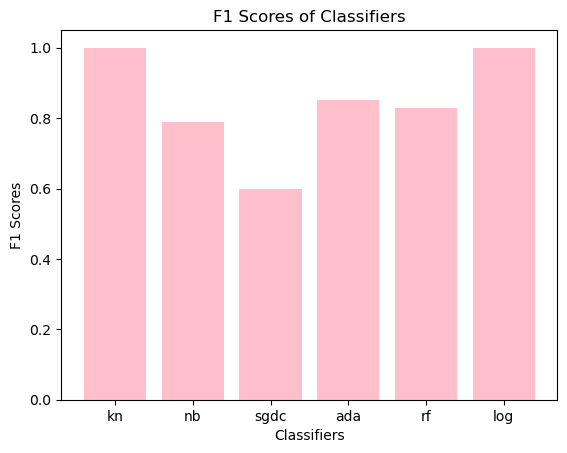

In [28]:
import matplotlib.pyplot as plt

lab = ['kn', 'nb', 'sgdc', 'ada', 'rf', 'log']
f1_scores = [1.0, 0.7896248068253519, 0.6, 0.8518369499285215, 0.8294820328526448, 1.0]

plt.bar(lab, f1_scores, color='pink')
plt.xlabel("Classifiers")
plt.ylabel("F1 Scores")
plt.title("F1 Scores of Classifiers")
plt.show()


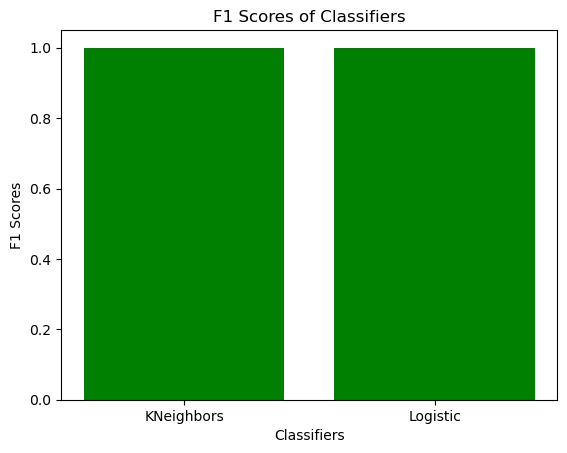

In [36]:
import matplotlib.pyplot as plt

lab = ['KNeighbors', 'Logistic']
f1_scores = [1.0, 1.0]

plt.bar(lab, f1_scores, color='green')
plt.xlabel("Classifiers")
plt.ylabel("F1 Scores")
plt.title("F1 Scores of Classifiers")
plt.show()

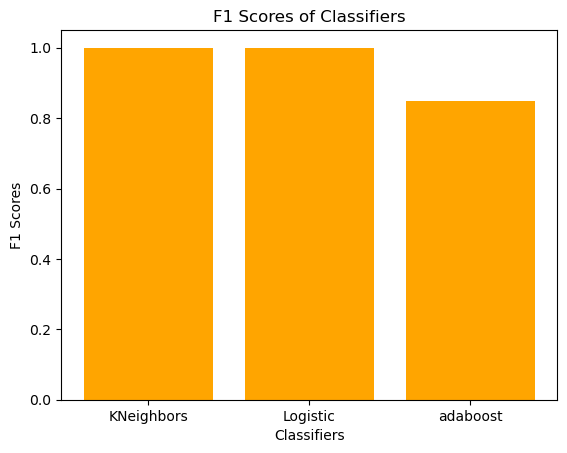

In [38]:
import matplotlib.pyplot as plt

lab = ['KNeighbors', 'Logistic','adaboost']
f1_scores = [1.0, 1.0,0.85]

plt.bar(lab, f1_scores, color='orange')
plt.xlabel("Classifiers")
plt.ylabel("F1 Scores")
plt.title("F1 Scores of Classifiers")
plt.show()